***PREGUNTA 1***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

***Inciso a)***

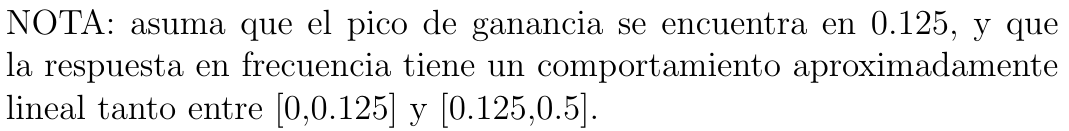

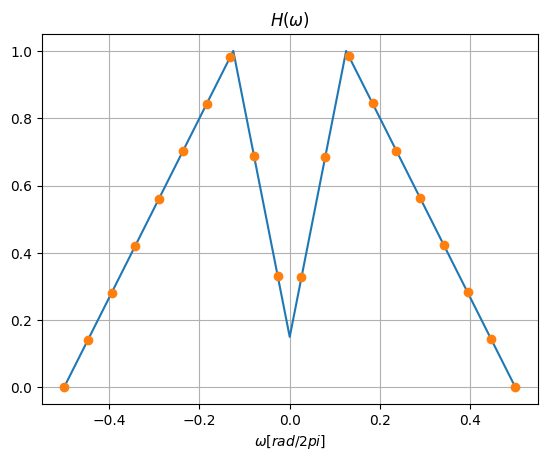

In [13]:
#Tomando en consideración la NOTA
#Primero tomaremos el caso ideal donde tenemos 1000 muestras
N=1000
N=int(N/4)

#Definimos la ecuación lineal de la primera porción de la respuesta en frecuencia del filtro
#Definimos la pendiente de la primera recta la cual tendrá un valor positivo
m1=(1-0.15)/(0.125*2*np.pi-0)
#Definimos el vector w1
w1 = np.linspace(0,0.125*2*np.pi, N, endpoint=False)
#Definimos la respuesta en frecuencia del primer filtro
H1=np.abs(w1)*m1 + 0.15
#Ahora definimos la ecuación lineal de la segunda porción de la respuesta en frecuencia del filtro
#Definimos la pendiente de la segunda recta la cual tendrá un valor negativo
m2 = (0 - 1)/(0.5*2*np.pi - 0.125*2*np.pi)
#Definimos el vector w2 tomando en cuenta que necesitamos ahora 3 veces la cantidad de muestras que tuvimos para el vector w1
w2 = np.linspace(0.125 * 2 * np.pi, 0.5 * 2 * np.pi, 3 * N, endpoint= False)
#Definimos la respusta en frecuencia del segundo filtro
H2 = np.abs(w2 - 0.125*2*np.pi)*m2 + 1
#Con el comando concatenate podemos unir ambas partes de las frecuencia para obtener el vector total
w = np.concatenate((w1, w2))
#Realizamos lo mismo para las respuestas en frecuencia, con el fin de obtener un solo vector o vector total
H = np.concatenate((H1, H2))

#Deseamos plotear de igual manera la respuesta en frecuencia para la parte negativa de las frecuencias
#Definimos un nuevo vector w y H para los valores negativos
w_nega = [-i for i in w[::-1]]
H_nega= [-i for i in -H[::-1]]

#Realizamos una nueva concatenación de las frecuencias , en este caso para el caso positivo y negativo
wtotal_id=np.concatenate((w_nega,w))
Htotal_id=np.concatenate((H_nega,H))

#Tenemos la designación de los indices para poder obtener las 20 muestras de la señal que deseamos
#5 por cada porción de recta , osea 10 para el eje de frecuencias positivo y 10 para el eje negativo
indx = np.linspace(0, len(wtotal_id) - 1, 20, dtype=int)
#Obtenemos el w y H por lo que definimos los valores de las muestras
w_tot = wtotal_id[indx]
H_tot = Htotal_id[indx]

#Ploteamos la respuesta en frecuencia obtenida , comparandola con la ideal (donde tenemos 1000 muestras)
plt.plot(wtotal_id/(2*np.pi), abs(Htotal_id))
plt.xlabel('$\omega[rad/2pi]$')
#plt.xlabel('$fraction(1/2)$')
plt.title('$H(\omega)$')
plt.plot(w_tot/(2*np.pi), H_tot, 'o')
plt.grid('on')

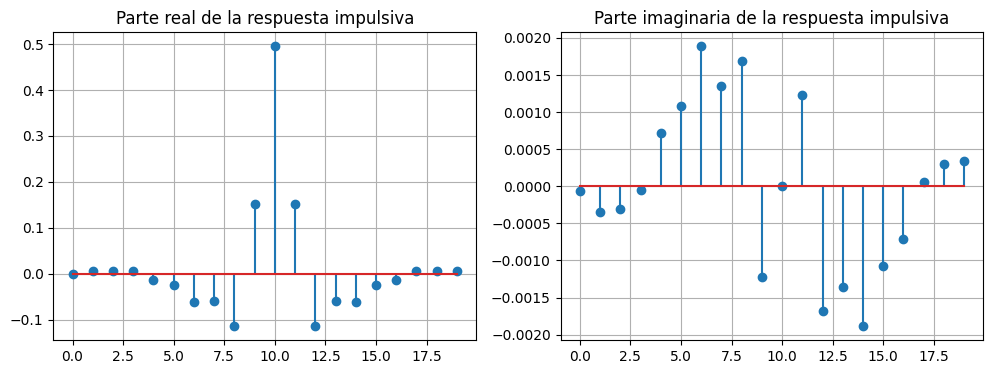

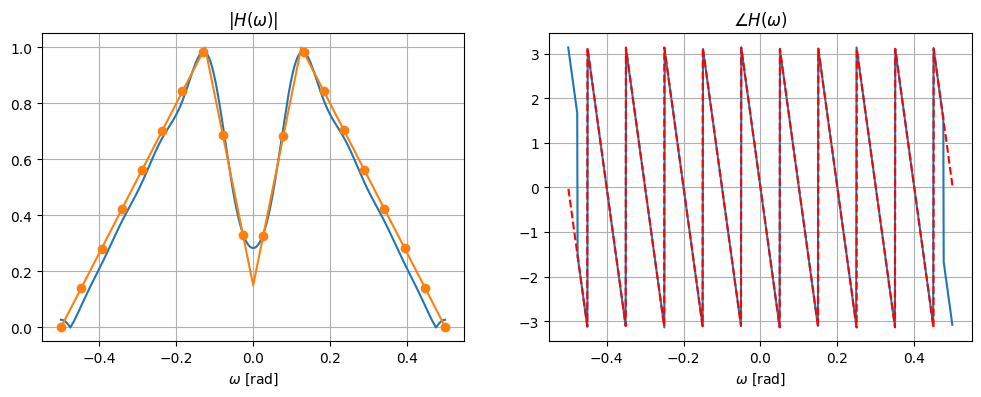

In [14]:
#Ahora tomaremos el caso para de 20 muestras
N=20
#Definimos el valor de alfa
alfa = w_tot[int(np.fix(N/2))]
#Hallamos la respuesta en el dominio del tiempo
Hw = np.fft.ifftshift(H_tot)
h_n = np.fft.ifft(Hw)
#Volvemos causal nuestra respuesta en frecuencia multiplicando por una exponencial
h_n = np.fft.fftshift(h_n) * np.exp(1j*alfa*(np.arange(N)-N/2))


fig = plt.figure(figsize=[12,4])
#Graficamos la parte real de la respuesta impulsiva en el domonio del tiempo discreto
plt.subplot(1,2,1)
plt.title('Parte real de la respuesta impulsiva')
plt.stem(np.real(h_n))
plt.grid('on')

#Graficamos la parte imaginaria de la respuesta impulsiva en el dominio del tiempo discreto
plt.subplot(1,2,2)
plt.title('Parte imaginaria de la respuesta impulsiva')
plt.stem(np.imag(h_n))
plt.grid('on')


N1 = 1024
#Hallamos la DTFT de la parte real de la respuesta al impulso que hallamos previamente y la trasladamos
H = np.fft.fft(np.real(h_n),N1)
H = np.fft.fftshift(H)
#Definimos el valor del vector omega
omg = (np.arange(0,N1) - N1/2)/N1

#Realizamos el ploteo de la magnitud de la parte real de la respuesta al impulso y la comparamos con el filtro ideal
fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(omg,np.abs(H))
plt.plot(w_tot/(2*np.pi),np.abs(H_tot),'C1o')
plt.plot(wtotal_id/(2*np.pi),np.abs(Htotal_id))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

#Realizamos el ploteo de la fase de la parte real de la respuesta al impulso y la comparamos con el filtro ideal
plt.subplot(1,2,2)
plt.plot(omg,np.angle(H))
plt.plot(wtotal_id/(2*np.pi),np.angle(np.exp(-1j*wtotal_id*np.fix(N/2))),'r--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')

***Inciso b)***

Para el caso de M=5

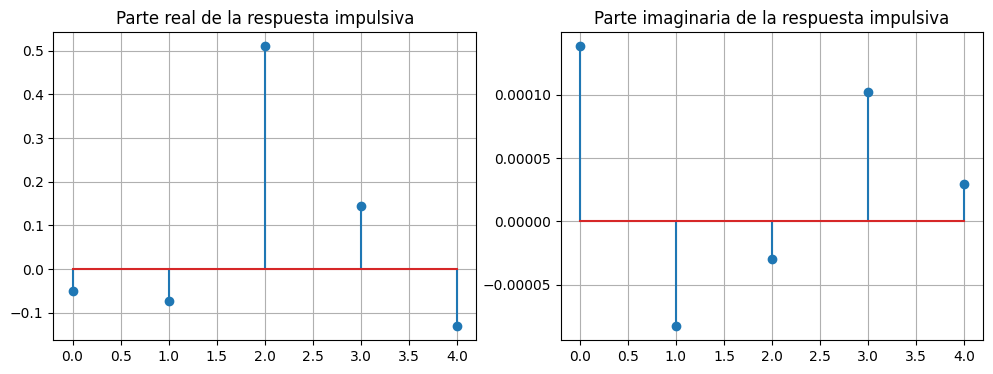

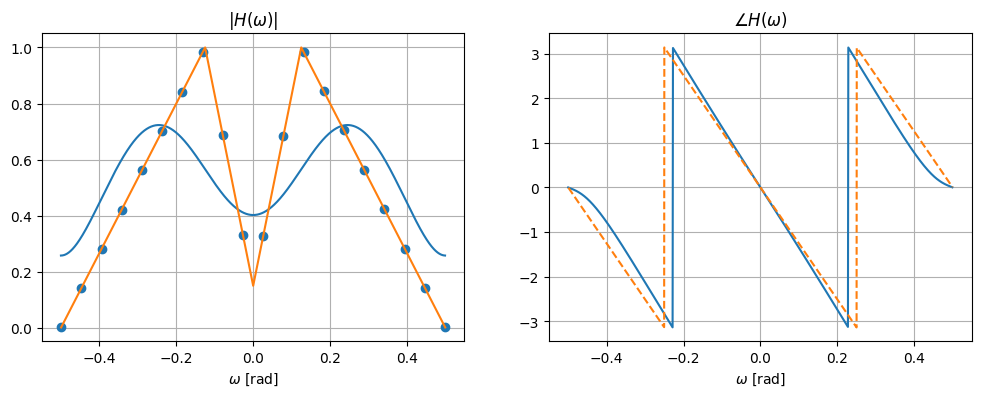

In [15]:
#Ahora diseñamos el filtro por el Método Least Squares para 5,7 y 10 coeficientes
# Matriz de Fourier
#Definimos el valor de N=20
N=20
#Primero tenemos el caso para M = 5
M = 5
#Definimos el vector A el cual sera una matriz de ceros del numero de muestras por el número de coefcientes
A = np.zeros((N,M),dtype=complex)
#Definimos el vector n
n = np.arange(M)
#Definimos la matriz de fourier basandonos en el código del profesor
for i in range(N):
    A[i,:] = np.exp(-1j*w_tot[i]*n)

#Obtenemos la respuesta al impulso con la matriz de fourier que hemos hallado previamente
h_n = np.fft.fftshift(np.matmul(np.linalg.inv(np.matmul(np.conj(A.T),A)),np.matmul(np.conj(A.T),H_tot)))

#Obtenemos el ploteo de la parte real de la respuesta impulsiva
fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title('Parte real de la respuesta impulsiva')
plt.stem(np.real(h_n))
plt.grid('on')

#Obtenemos el ploteo de la parte imaginaria de la respuesta impulsiva
plt.subplot(1,2,2)
plt.title('Parte imaginaria de la respuesta impulsiva')
plt.stem(np.imag(h_n))
plt.grid('on')


N = 1024
#Hallamos la DFT de la parte real de la respuesta al impulso que hallamos previamente y la trasladamos
H= np.fft.fft(np.real(h_n),N)
H= np.fft.fftshift(H)
#Definimos el vector omg
omg = 2*np.pi*(np.arange(0,N) - N/2)/N


#Realizamos el ploteo de las magnitudes de las respuestas en frecuencia de la ideal vs M=5
fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(omg/(2*np.pi), np.abs(H))
plt.plot(w_tot/(2*np.pi),np.abs(H_tot),'C0o')
plt.plot(wtotal_id/(2*np.pi),np.abs(Htotal_id))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

#Realizamos el ploteo de las fases de las respuestas en frecuencia de la ideal vs M=5
plt.subplot(1,2,2)
plt.plot(omg/(2*np.pi),np.angle(H))
plt.plot(wtotal_id/(2*np.pi),np.angle(np.exp(-1j*wtotal_id*(M-1)/2)),'--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')

Para el caso de M=7

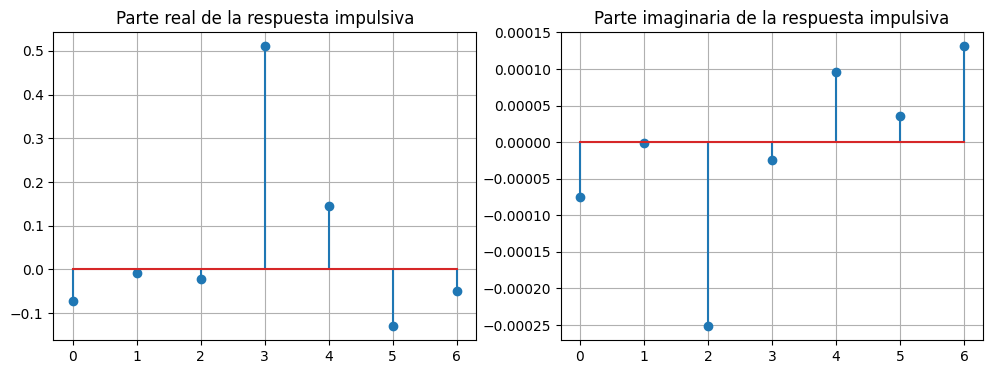

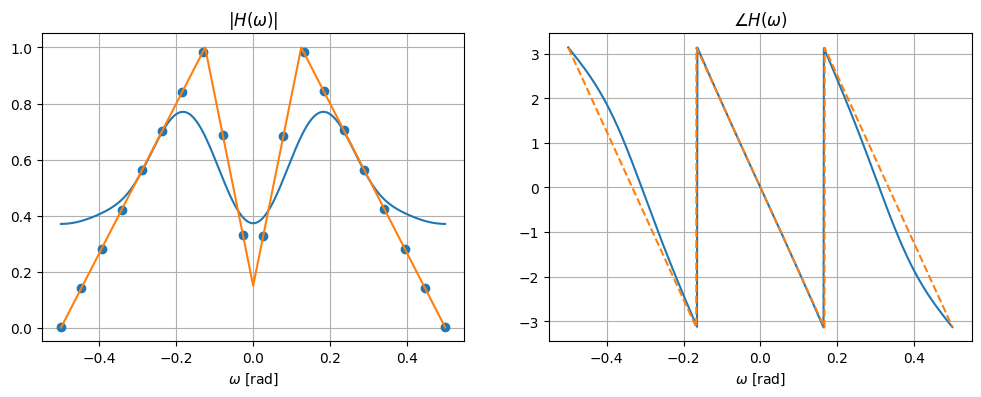

In [16]:
#Ahora diseñamos el filtro por el Método Least Squares para 5,7 y 10 coeficientes
# Matriz de Fourier
#Definimos el valor de N=20
N=20
#Primero tenemos el caso para M = 7
M = 7
#Definimos el vector A el cual sera una matriz de ceros del numero de muestras por el número de coefcientes
A = np.zeros((N,M),dtype=complex)
#Definimos el vector n
n = np.arange(M)
#Definimos la matriz de fourier basandonos en el código del profesor
for i in range(N):
    A[i,:] = np.exp(-1j*w_tot[i]*n)

#Obtenemos la respuesta al impulso con la matriz de fourier que hemos hallado previamente
h_n = np.fft.fftshift(np.matmul(np.linalg.inv(np.matmul(np.conj(A.T),A)),np.matmul(np.conj(A.T),H_tot)))

#Obtenemos el ploteo de la parte real de la respuesta impulsiva
fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title('Parte real de la respuesta impulsiva')
plt.stem(np.real(h_n))
plt.grid('on')

#Obtenemos el ploteo de la parte imaginaria de la respuesta impulsiva
plt.subplot(1,2,2)
plt.title('Parte imaginaria de la respuesta impulsiva')
plt.stem(np.imag(h_n))
plt.grid('on')


N = 1024
#Hallamos la DFT de la parte real de la respuesta al impulso que hallamos previamente y la trasladamos
H= np.fft.fft(np.real(h_n),N)
H= np.fft.fftshift(H)
#Definimos el vector omg
omg = 2*np.pi*(np.arange(0,N) - N/2)/N


#Realizamos el ploteo de las magnitudes de las respuestas en frecuencia de la ideal vs M=7
fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(omg/(2*np.pi), np.abs(H))
plt.plot(w_tot/(2*np.pi),np.abs(H_tot),'C0o')
plt.plot(wtotal_id/(2*np.pi),np.abs(Htotal_id))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

#Realizamos el ploteo de las fases de las respuestas en frecuencia de la ideal vs M=7
plt.subplot(1,2,2)
plt.plot(omg/(2*np.pi),np.angle(H))
plt.plot(wtotal_id/(2*np.pi),np.angle(np.exp(-1j*wtotal_id*(M-1)/2)),'--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')

Para el caso de M=10

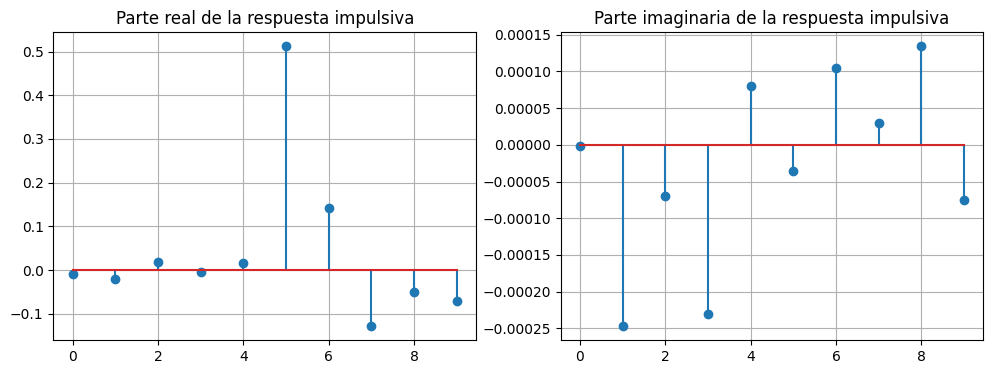

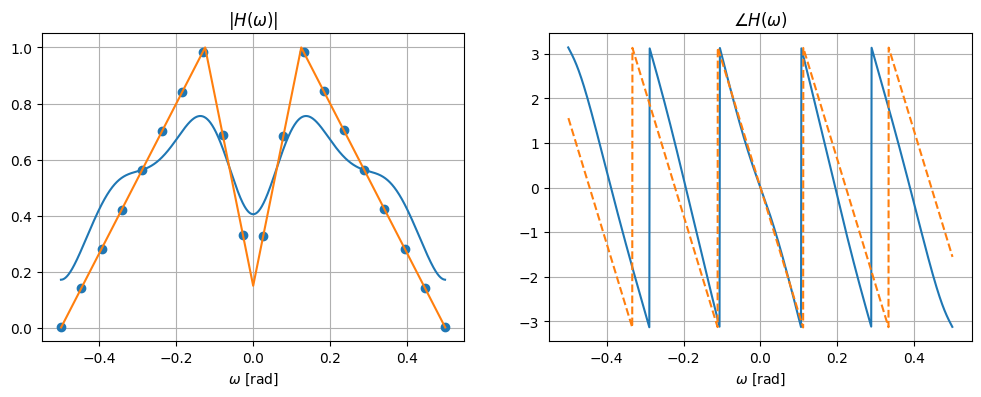

In [17]:
#Ahora diseñamos el filtro por el Método Least Squares para 5,7 y 10 coeficientes
# Matriz de Fourier
#Definimos el valor de N=20
N=20
#Primero tenemos el caso para M = 10
M = 10
#Definimos el vector A el cual sera una matriz de ceros del numero de muestras por el número de coefcientes
A = np.zeros((N,M),dtype=complex)
#Definimos el vector n
n = np.arange(M)
#Definimos la matriz de fourier basandonos en el código del profesor
for i in range(N):
    A[i,:] = np.exp(-1j*w_tot[i]*n)

#Obtenemos la respuesta al impulso con la matriz de fourier que hemos hallado previamente
h_n = np.fft.fftshift(np.matmul(np.linalg.inv(np.matmul(np.conj(A.T),A)),np.matmul(np.conj(A.T),H_tot)))

#Obtenemos el ploteo de la parte real de la respuesta impulsiva
fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title('Parte real de la respuesta impulsiva')
plt.stem(np.real(h_n))
plt.grid('on')

#Obtenemos el ploteo de la parte imaginaria de la respuesta impulsiva
plt.subplot(1,2,2)
plt.title('Parte imaginaria de la respuesta impulsiva')
plt.stem(np.imag(h_n))
plt.grid('on')


N = 1024
#Hallamos la DFT de la parte real de la respuesta al impulso que hallamos previamente y la trasladamos
H = np.fft.fft(np.real(h_n),N)
H = np.fft.fftshift(H)
#Definimos el vector omg
omg = 2*np.pi*(np.arange(0,N) - N/2)/N


#Realizamos el ploteo de las magnitudes de las respuestas en frecuencia de la ideal vs M=10
fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(omg/(2*np.pi), np.abs(H))
plt.plot(w_tot/(2*np.pi),np.abs(H_tot),'C0o')
plt.plot(wtotal_id/(2*np.pi),np.abs(Htotal_id))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

#Realizamos el ploteo de las fases de las respuestas en frecuencia de la ideal vs M=10
plt.subplot(1,2,2)
plt.plot(omg/(2*np.pi),np.angle(H))
plt.plot(wtotal_id/(2*np.pi),np.angle(np.exp(-1j*wtotal_id*(M-1)/2)),'--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')

***Inciso c)***


Al comparar ambos métodos de diseños de filtros digitales podemos notar que para el método de muestreo en frecuencia tenemos un control más detallado en la respuesta en frecuencia del filtro en frecuencias especificas debido a las muestras con las que trabajamos ,sin embargo para el método de minimos cuadrados logramos una buena aproximación dentro de todo el rango de frecuencias con las que trabajamos.